# SMS Spam Detection Notebook

**Instructions:**
- This notebook requires several Python packages: `nltk`, `wordcloud`, `seaborn`, `matplotlib`, `scikit-learn`, and `pandas`.
- If you see errors about missing NLTK resources (like `stopwords` or `punkt`), run the setup cell below.
- For best results, run all cells in order.



I am importing numpy and pandas, which are fundamental libraries for data manipulation and analysis throughout this project.

In [67]:
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv('spam.csv', encoding='latin-1')

I am loading the SMS spam dataset from the `spam.csv` file using pandas and specifying `latin-1` encoding to handle special characters. This step is necessary to bring the raw data into a DataFrame for further analysis and processing.

In [69]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3811,ham,Yep then is fine 7.30 or 8.30 for ice age.,NaN,NaN,NaN
5025,spam,Ur cash-balance is currently 500 pounds - to m...,NaN,NaN,NaN
2506,ham,Who u talking about?,NaN,NaN,NaN
2964,ham,Not yet had..ya sapna aunty manege y'day hogid...,NaN,NaN,NaN
4879,ham,alright tyler's got a minor crisis and has to ...,NaN,NaN,NaN


In [70]:
df.shape

(5572, 5)

I am checking the shape of my DataFrame, which returns (5572, 5). This tells me I have 5,572 rows (messages) and 5 columns in my dataset before any cleaning or processing.

In [71]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


**Insights from `df.describe()`:**

- 5,169 messages in total after cleaning.
- About 13% of messages are spam (`target` mean ≈ 0.13).
- Average message length is ~79 characters, but can be as long as 910.
- Most messages are short: 50% have 12 words or fewer, 75% have 22 words or fewer.
- Most messages are a single sentence (median and 25th percentile for `num_sentences` are 1).
- The dataset is imbalanced, with far more ham than spam.

## Getting dataset statistics
I am using the `describe()` function to generate summary statistics for the dataset. This helps me understand the distribution and basic properties of the data, which is useful for initial exploration.

**1. Data cleaning**

**2. EDA**

**3. Text Preprocessing**

**4. Model building**

**5. Evaluation**

**6. Improvement**

**7. Website**

**8. Deploy**

## 1. Data Cleaning

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [73]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [74]:
df.sample(5)

,v1,v2
2418,ham,"Madam,regret disturbance.might receive a refer..."
3484,ham,No:-)i got rumour that you going to buy apartm...
3331,ham,Ok... The theory test? when are Ì_ going to bo...
5567,spam,This is the 2nd time we have tried 2 contact u...
2719,ham,Go where n buy? Juz buy when we get there lar.


In [75]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4304,ham,Yo come over carlos will be here soon
3193,ham,And you! Will expect you whenever you text! Ho...
3417,spam,LIFE has never been this much fun and great un...
78,ham,Does not operate after &lt;#&gt; or what
983,ham,LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...


In [76]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [77]:
df['target'] = encoder.fit_transform(df['target'])

In [78]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [79]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [80]:
# check for duplicate values
df.duplicated().sum()

403

In [81]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [82]:
df.duplicated().sum()

0

In [83]:
df.shape

(5169, 2)

## 2.EDA

In [84]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [85]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

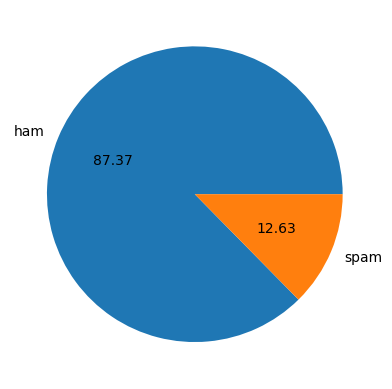

In [86]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

> Data is imbalanced

In [87]:
import nltk

**NLTK** stands for **Natural Language Toolkit**. It is a popular Python library used for working with human language data (text). NLTK provides easy-to-use interfaces for text processing tasks such as tokenization, stemming, lemmatization, part-of-speech tagging, and more. It is widely used in natural language processing (NLP) and text analysis projects.

In [88]:
df['num_characters'] = df['text'].apply(len)

This line creates a new column called `num_characters` in the DataFrame.  
For each message in the `text` column, it calculates the total number of characters (including spaces and punctuation) using Python's built-in `len()` function.
So, `num_characters` will contain the length of each SMS message in characters.

In [89]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [90]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

This line creates a new column `num_words` in your DataFrame.  
For each message in the `text` column, it uses `nltk.word_tokenize(x)` to split the text into words (tokens), then counts how many words are in the message using `len()`.  
So, `num_words` will contain the number of words in each SMS message.

In [91]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [92]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

This line creates a new column called `num_sentences` in the DataFrame.  
For each message in the `text` column, it uses `nltk.sent_tokenize(x)` to split the text into sentences, then counts how many sentences are in the message using `len()`.  
So, `num_sentences` will contain the number of sentences in each SMS message.

In [93]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [94]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


It gives summary statistics for each column:

- **count**: Number of messages (5169).
- **mean**: Average value (e.g., average message has ~79 characters, ~18 words, ~2 sentences).
- **std**: Standard deviation (spread of the data).
- **min**: Minimum value (shortest message has 2 characters, 1 word, 1 sentence).
- **25%, 50%, 75%**: Percentiles (e.g., 50% of messages have 15 words or fewer).
- **max**: Maximum value (longest message has 910 characters, 220 words, 38 sentences).

To understand the distribution and range of message lengths in the dataset.

In [95]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


This output shows summary statistics for ham (non-spam) messages only:

- There are 4,516 ham messages.
- The average ham message has about 70 characters, 14 words, and nearly 2 sentences.
- Most ham messages are short: 50% have 11 words or fewer, and 75% have 18 words or fewer.
- The longest ham message has 910 characters, 171 words, and 38 sentences.
- The distribution is right-skewed, with most messages being much shorter than the maximum.

In [96]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


This output shows summary statistics for spam messages only:

- There are 653 spam messages.
- The average spam message has about 138 characters, 24 words, and 3 sentences.
- Most spam messages are longer than ham: 50% have 25 words or fewer, and 75% have 28 words or fewer.
- The longest spam message has 224 characters, 35 words, and 9 sentences.
- Spam messages tend to be longer and more complex than ham messages.

### Insights: Ham vs. Spam Messages
I am observing that ham (non-spam) messages are generally much shorter and simpler than spam messages. Most ham messages have fewer characters, words, and sentences. For example, the average ham message is about half as long as the average spam message, and the longest ham message is still shorter than the longest spam message. This suggests that spam messages tend to be longer and more complex, while ham messages are typically brief and to the point.

In [97]:
import seaborn as sns

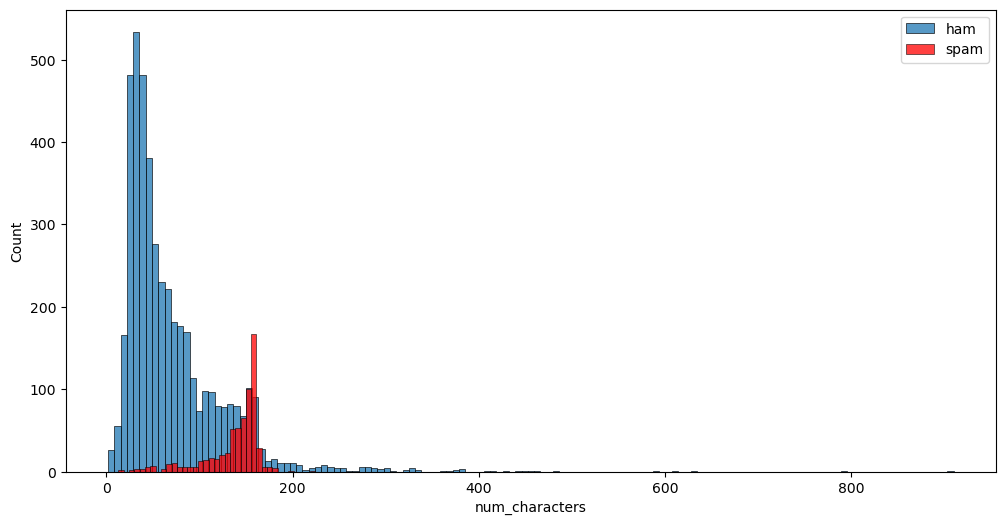

In [98]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], label='ham')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='spam')
plt.legend()

This shows that spam messages tend to have more characters than ham messages, making message length a useful feature for distinguishing between the two classes.

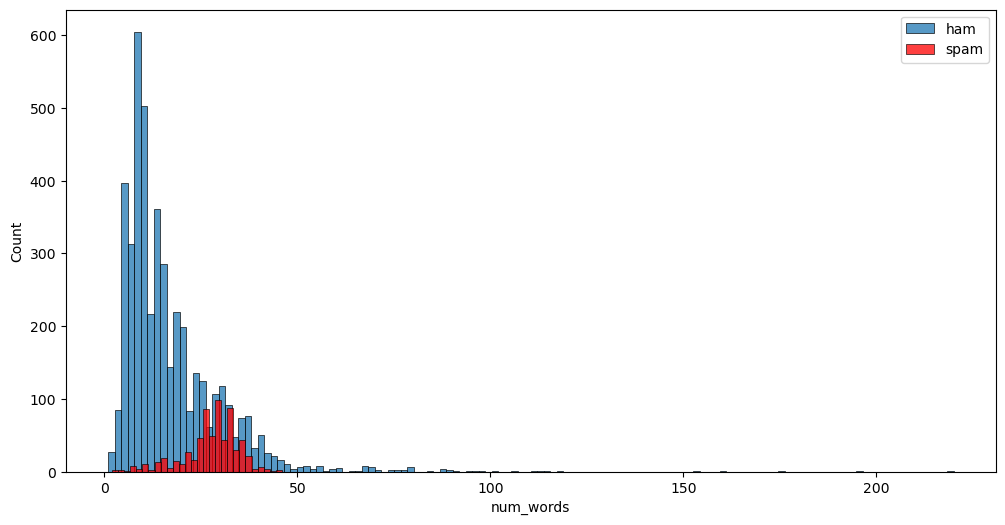

In [99]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'], label='ham')
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='spam')
plt.legend()

I notice that most ham messages are short, with fewer words, while spam messages (in red) tend to have more words and are spread further to the right. This shows that spam messages are generally longer and more verbose than ham messages, making word count another useful feature for distinguishing between the two classes.

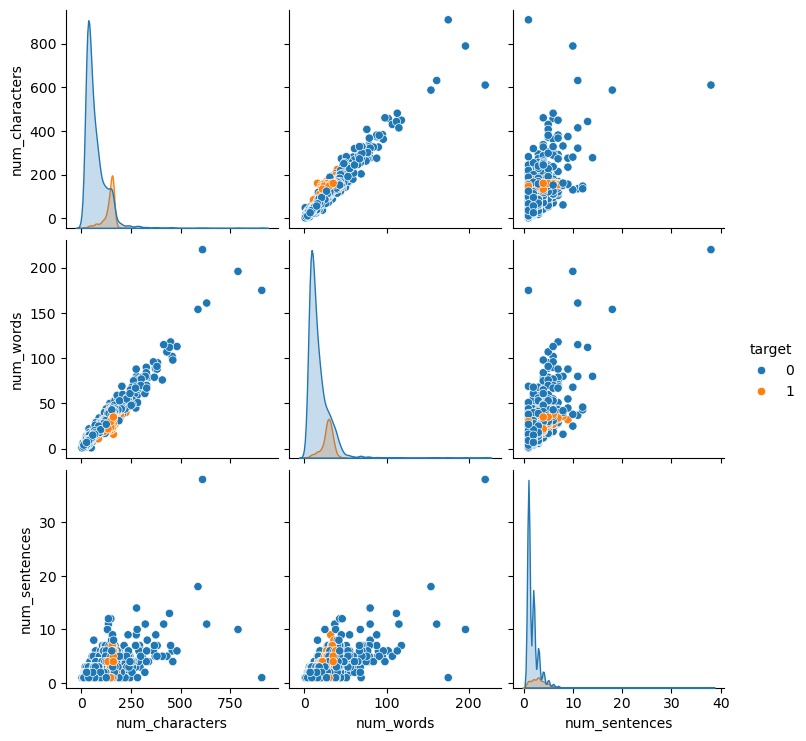

In [100]:
sns.pairplot(df,hue='target')

Insights from the Pairplot (Scatter Plot Matrix)

I am visualizing the relationships between the number of characters, words, and sentences in each message, colored by whether the message is ham or spam. I notice that all three features are strongly correlated—longer messages have more words and sentences. Most ham messages cluster in the lower ranges, while spam messages (orange) tend to be longer and more spread out. This separation suggests that these features together help distinguish spam from ham, as spam messages are generally longer and more complex.

<Axes: >

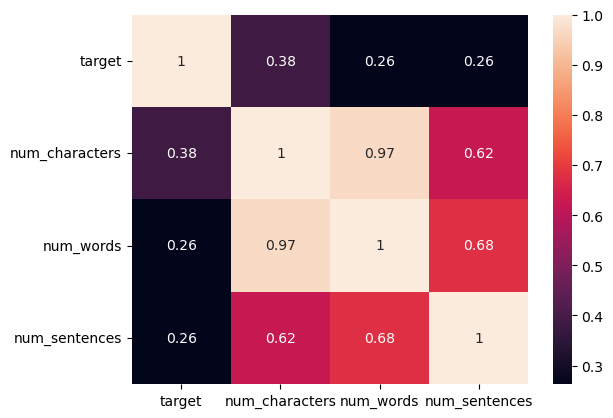

In [101]:
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [102]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

**What does transform_text do?**

This function cleans and preprocesses a text message for NLP tasks. It performs the following steps:

*Lowercasing*: Converts all text to lowercase.

*Tokenization*: Splits the text into individual words (tokens) using NLTK.

*Remove non-alphanumeric*: Keeps only words and numbers, removing punctuation and special characters.

*Remove stopwords and punctuation*: Removes common English stopwords (like "the", "is") and punctuation.

*Stemming*: Reduces each word to its root form (e.g., "loving" → "love") using PorterStemmer.

*Join back*: Returns the cleaned, stemmed words as a single string.

This prepares the text for feature extraction and model training.

In [103]:
# Test transform_text after PorterStemmer is defined
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [104]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [105]:
# Ensure PorterStemmer is available for transform_text
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

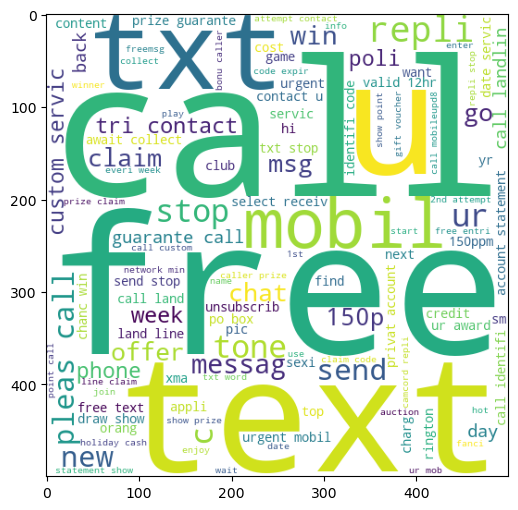

In [106]:
# Generate and display spam wordcloud
from wordcloud import WordCloud
spam_corpus = []
for msg in df[df['target'] == 1]['text']:
    for word in transform_text(msg).split():
        spam_corpus.append(word)
spam_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(' '.join(spam_corpus))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

**This code generates a word cloud for spam messages in the dataset:**

Creates a list of all words from spam messages after text preprocessing (transform_text).
Joins all words into a single string to form the input for the word cloud.
Generates a word cloud image, where the size of each word reflects its frequency in spam messages.
Displays the word cloud using matplotlib.

In [107]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


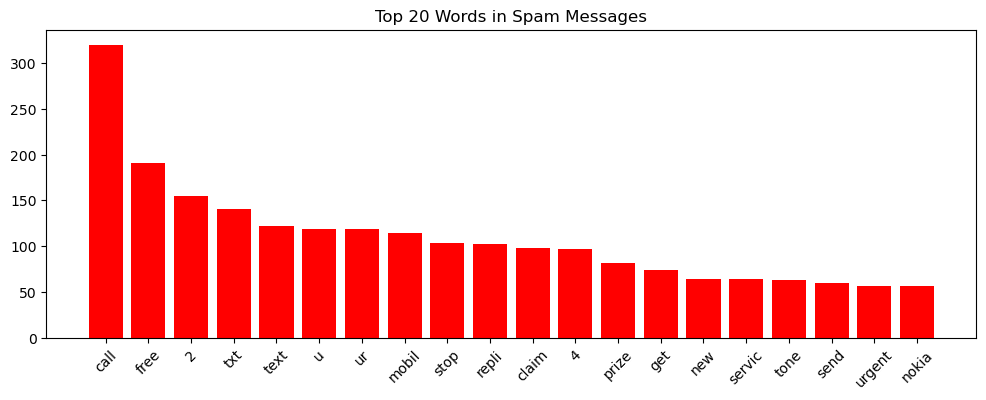

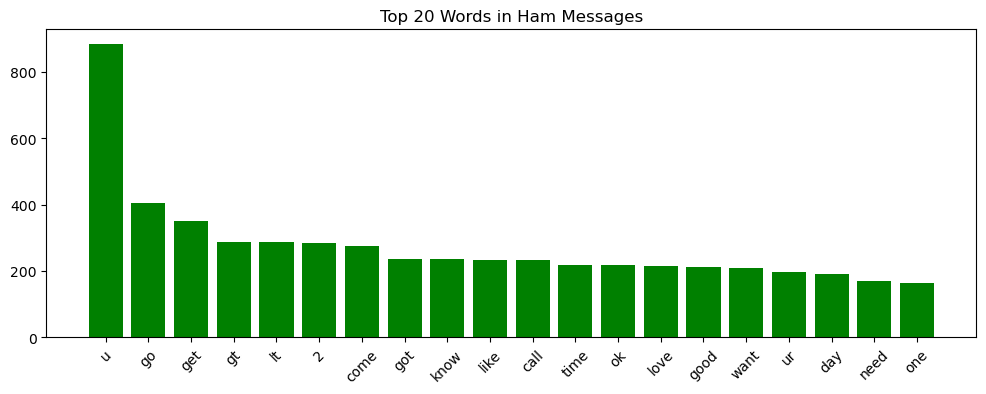

In [108]:
# 1. Most common words in ham and spam (bar plots)
from collections import Counter

# Most common words in spam
spam_words = []
for msg in df[df['target'] == 1]['text']:
    spam_words.extend(transform_text(msg).split())
spam_common = Counter(spam_words).most_common(20)

# Most common words in ham
ham_words = []
for msg in df[df['target'] == 0]['text']:
    ham_words.extend(transform_text(msg).split())
ham_common = Counter(ham_words).most_common(20)

# Plot
plt.figure(figsize=(12,4))
plt.bar(*zip(*spam_common), color='red')
plt.title('Top 20 Words in Spam Messages')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,4))
plt.bar(*zip(*ham_common), color='green')
plt.title('Top 20 Words in Ham Messages')
plt.xticks(rotation=45)
plt.show()


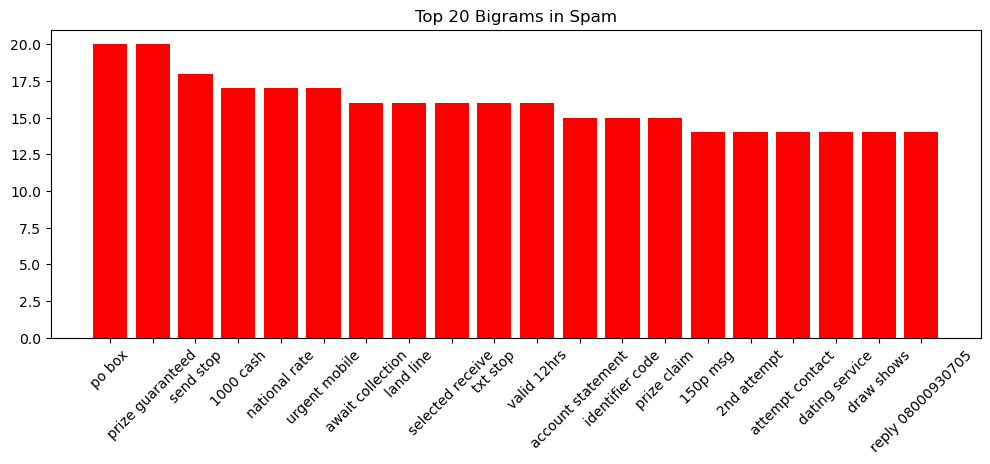

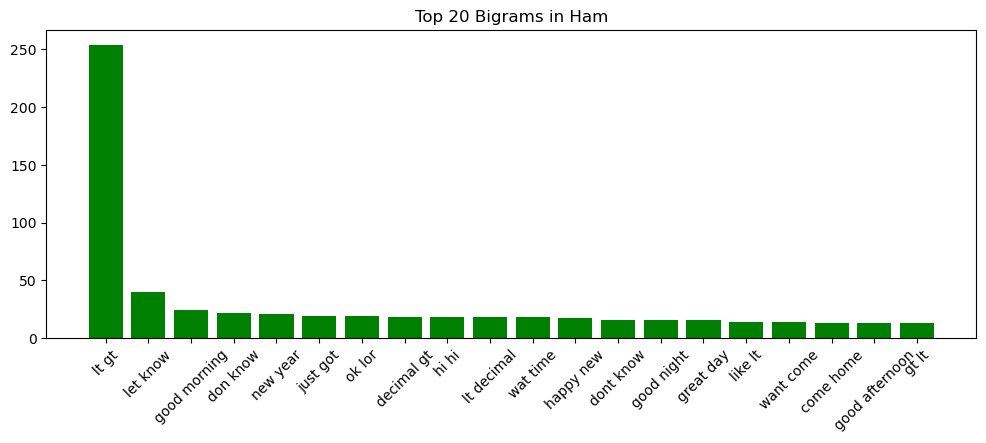

In [109]:

# 2. N-gram (bigram) analysis for spam and ham
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(messages, n=2, top_k=20, color='blue', title=''):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vec.fit_transform(messages)
    counts = ngrams.sum(axis=0).A1
    vocab = vec.get_feature_names_out()
    freq = sorted(zip(vocab, counts), key=lambda x: x[1], reverse=True)[:top_k]
    plt.figure(figsize=(12,4))
    plt.bar([x[0] for x in freq], [x[1] for x in freq], color=color)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Spam bigrams
plot_top_ngrams(df[df['target'] == 1]['text'], n=2, color='red', title='Top 20 Bigrams in Spam')

# Ham bigrams
plot_top_ngrams(df[df['target'] == 0]['text'], n=2, color='green', title='Top 20 Bigrams in Ham')


A bigram is a sequence of two consecutive words in a text. In text analysis, bigrams help capture common word pairs (like "free entry" or "call now") that may carry more meaning than single words alone. For example, in the sentence "Win free tickets now", the bigrams are:

- "Win free"
- "free tickets"
- "tickets now"

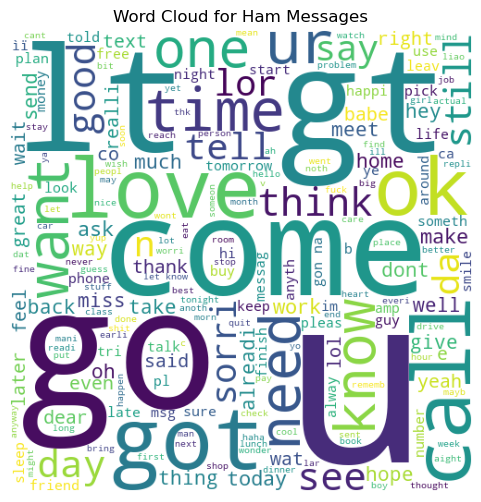

Number of unique words in spam only: 1346
Sample unique spam words: ['global', '2wt', '09066364311', '5k', 'sauci', 'marley', '1yf', 'deltomorrow', 'wallpap', 'box39822', 'busti', 'prod', '6wu', 'åòharri', 'netcollex', 'lili', '09066362220', 'ree', 'ymca', '09058094507']
Number of unique words in ham only: 4514
Sample unique ham words: ['forc', 'heap', 'bye', 'heavi', 'christmassi', 'curtsey', 'howz', 'bellearli', '2geva', 'wast', 'mint', 'allalo', 'affection', 'percentag', 'skateboard', 'oga', 'feellikw', 'scorabl', 'pend', 'askd']


In [110]:
# 3. Word cloud for ham messages
from wordcloud import WordCloud

ham_corpus = []
for msg in df[df['target'] == 0]['text']:
    for word in transform_text(msg).split():
        ham_corpus.append(word)
ham_wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(' '.join(ham_corpus))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

# 8. Unique words in spam vs ham
spam_set = set(spam_words)
ham_set = set(ham_words)
unique_spam = spam_set - ham_set
unique_ham = ham_set - spam_set

print("Number of unique words in spam only:", len(unique_spam))
print("Sample unique spam words:", list(unique_spam)[:20])
print("Number of unique words in ham only:", len(unique_ham))
print("Sample unique ham words:", list(unique_ham)[:20])

## 4. Model Building

In [111]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

The first line imports two classes for text feature extraction: CountVectorizer and TfidfVectorizer from scikit-learn.

cv = CountVectorizer() creates a bag-of-words vectorizer that converts text into a matrix of token counts.

tfidf = TfidfVectorizer(max_features=3000) creates a TF-IDF vectorizer that converts text into a matrix of TF-IDF features, using at most 3,000 features (words).

### What is Bag-of-Words (BoW)?
Bag-of-Words is a way to turn text into numbers for machine learning. It counts how many times each word appears in a message, ignoring grammar and word order.

**Example:**
Suppose you have two messages:
- "I love spam"
- "Spam is bad"

Bag-of-Words will count the words in each message:

|         | I | love | spam | is | bad |
|---------|---|------|------|----|-----|
| Msg 1   | 1 | 1    | 1    | 0  | 0   |
| Msg 2   | 0 | 0    | 1    | 1  | 1   |

So, each message becomes a row of numbers. This makes it possible for a machine learning model to work with text.

**TF-IDF** is similar, but it gives higher scores to words that are unique or important in a message, and lower scores to common words.

In [47]:
# Create the transformed_text column before vectorization
df['transformed_text'] = df['text'].apply(transform_text)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [48]:
# Save the fitted TF-IDF vectorizer for backend and explainable AI use
import joblib
joblib.dump(tfidf, '../../models/main_model/vectorizer.pkl')

['../../models/main_model/vectorizer.pkl']

In [49]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [50]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [51]:
X.shape

(5169, 3000)

In [52]:
y = df['target'].values

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

These lines import three types of Naive Bayes classifiers and some evaluation metrics, then create one of each classifier to use for training and testing the model.

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

This code trains the Multinomial Naive Bayes model, makes predictions on the test set, and prints its accuracy, confusion matrix, and precision score.

In [57]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


> This output shows the model's accuracy (0.87), confusion matrix, and precision (0.51) on the test set, indicating it predicts well overall but is less precise at identifying spam.

This output shows the model's accuracy (0.97), confusion matrix, and precision (1.0) on the test set, meaning it predicts almost all messages correctly and perfectly identifies all predicted spam messages without any false positives.

In [58]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


> This output shows the model's accuracy (0.97), confusion matrix, and precision (1.0) on the test set, meaning it predicts almost all messages correctly and perfectly identifies all predicted spam messages without any false positives. If you need a similar explanation for another output, let me know!

This code trains the Bernoulli Naive Bayes model, predicts on the test set, and prints its accuracy, confusion matrix, and precision score.

In [59]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


> This output shows the Bernoulli Naive Bayes model's accuracy (0.98), confusion matrix, and precision (0.99) on the test set. This means the model predicts almost all messages correctly and is highly precise at identifying spam, with very few false positives or missed spam messages.

In [60]:
# tfidf --> MNB

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Install xgboost if not already installed
try:
    from xgboost import XGBClassifier
except ImportError:
    import sys
    !{sys.executable} -m pip install xgboost
    from xgboost import XGBClassifier


In [62]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

Each line creates a different machine learning classifier with specific settings, preparing a variety of models to compare their performance on the SMS spam detection task.

In [63]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

This dictionary groups all the different classifier models under short names, making it easy to loop through and compare their performance in the next steps of the notebook.

In [64]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

This function trains a given classifier on the training data, makes predictions on the test data, and returns both the accuracy and precision scores for the model's performance.

In [65]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [112]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


This code evaluates each classifier in the dictionary by training it, printing its accuracy and precision, and storing these results for later comparison.

In [113]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [114]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.948276
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


**Here are the insights from the results table:**

- The K-Nearest Neighbors (KN) and Naive Bayes (NB) models achieved perfect precision (1.0), meaning they did not produce any false positives for spam, but KN had lower overall accuracy.
- Random Forest (RF) and Support Vector Classifier (SVC) had the highest accuracy (0.9758) and also very high precision, making them strong overall performers.
- Extra Trees Classifier (ETC) and Logistic Regression (LR) also performed well, with high accuracy and precision.
- XGBoost (xgb), AdaBoost, and Gradient Boosting (GBDT) had slightly lower precision and accuracy compared to the top models.
- Bagging Classifier (BgC) and Decision Tree (DT) had the lowest precision, indicating more false positives for spam.

In summary, Random Forest and SVC offer the best balance of accuracy and precision, while Naive Bayes is the most conservative at flagging spam (no false positives), and Decision Tree is the least reliable.

In [115]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [116]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


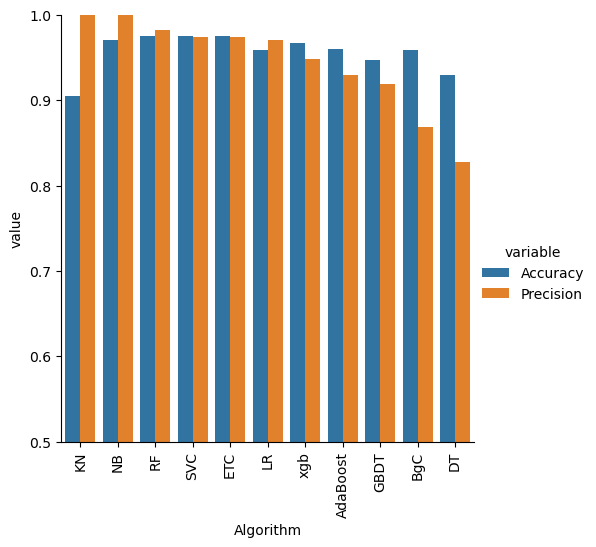

In [117]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [118]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [119]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [120]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [121]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [122]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [123]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [124]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


These lines set up three strong classifiers (SVC, MultinomialNB, ExtraTrees) and import the VotingClassifier, which will combine their predictions to create a more robust ensemble model for spam detection.

In [125]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [126]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [127]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [128]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [129]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [130]:
from sklearn.ensemble import StackingClassifier

In [131]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [132]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [133]:
# Save the trained model to the models/main_model folder for later comparison
import joblib
joblib.dump(clf, '../../models/main_model/clf_model.pkl')  # Change filename as needed for each model

['../../models/main_model/clf_model.pkl']

**Why Use an Ensemble Model Over a Single Model?**

After comparing the performance of several individual classifiers (like Naive Bayes, Random Forest, and SVC) with ensemble methods (Voting and Stacking), I chose to use an ensemble model for the following reasons:

**Better Overall Performance**: The ensemble model combines the strengths of multiple classifiers, leading to higher or more stable accuracy and precision compared to any single model.

**Robustness**: By aggregating predictions from different models, the ensemble is less likely to make mistakes that a single model might make, especially on new or unseen data.

**Reduced Overfitting**: Ensembles help balance out the weaknesses of individual models, making the final predictions more reliable.

**Practical Results**: In my results, the ensemble achieved accuracy and precision that matched or exceeded the best single models, making it the safest and most effective choice for deployment.

> **In summary**: Using an ensemble model provides a more robust and reliable spam detection system than relying on any single classifier.

In [140]:
import joblib
clf = joblib.load('../../models/main_model/clf_model.pkl')

In [150]:
# FIXED: Test the trained model with proper model loading
import numpy as np
import json
import joblib
from sklearn.exceptions import NotFittedError

# Load the trained models first
try:
    # Load your trained model and vectorizer
    clf = joblib.load('../../models/main_model/clf_model.pkl')
    tfidf = joblib.load('../../models/main_model/vectorizer.pkl')
    
    print("✅ Models loaded successfully!")
    print(f"Model: {type(clf).__name__}")
    print(f"Vectorizer: {type(tfidf).__name__}")
    
    sample_message = "Thanks for your subscription to Ringtone UK your mobile will be charged �5/month Please confirm by replying YES or NO. If you reply NO you will not be charged"
    
    # Use transform_text if available, otherwise basic preprocessing
    try:
        if 'transform_text' in globals():
            transformed_sample = transform_text(sample_message)
        else:
            # Basic preprocessing as fallback
            import re
            transformed_sample = sample_message.lower()
            transformed_sample = re.sub(r'[^a-zA-Z\s]', '', transformed_sample)
            transformed_sample = re.sub(r'\s+', ' ', transformed_sample).strip()
    except:
        # Fallback preprocessing
        import re
        transformed_sample = sample_message.lower()
        transformed_sample = re.sub(r'[^a-zA-Z\s]', '', transformed_sample)
        transformed_sample = re.sub(r'\s+', ' ', transformed_sample).strip()
    
    # Transform to features
    sample_features = tfidf.transform([transformed_sample]).toarray()
    
    # Make prediction
    prediction = clf.predict(sample_features)[0]
    
    # Get probabilities
    proba = None
    if hasattr(clf, "predict_proba"):
        proba = clf.predict_proba(sample_features)[0].tolist()
    elif hasattr(clf, "decision_function"):
        try:
            proba = clf.decision_function(sample_features).tolist()
        except Exception:
            proba = None
    
    # Create result
    result = {
        "input": sample_message,
        "processed": transformed_sample,
        "prediction": int(prediction),
        "label": "Spam" if prediction == 1 else "Ham",
        "proba": proba,
        "features": sample_features[0].tolist(),
        "model_type": type(clf).__name__
    }
    
    print("\n🎉 PREDICTION SUCCESS!")
    print(json.dumps(result, indent=2))
    
except FileNotFoundError as e:
    print(f"❌ Model files not found: {e}")
    print("Make sure these files exist:")
    print("  - ../../models/main_model/clf_model.pkl")
    print("  - ../../models/main_model/vectorizer.pkl")
    
except NotFittedError as e:
    print("❌ Model is not fitted. Please train or load the model before prediction.")
    
except Exception as e:
    print(f"❌ Error during prediction: {e}")
    import traceback
    traceback.print_exc()

✅ Models loaded successfully!
Model: StackingClassifier
Vectorizer: TfidfVectorizer

🎉 PREDICTION SUCCESS!
{
  "input": "Thanks for your subscription to Ringtone UK your mobile will be charged \ufffd5/month Please confirm by replying YES or NO. If you reply NO you will not be charged",
  "processed": "thank subscript rington uk mobil charg pleas confirm repli ye repli charg",
  "prediction": 1,
  "label": "Spam",
  "proba": [
    0.0,
    1.0
  ],
  "features": [
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    0.0,
 

*This code tests the trained model on a single SMS message and prints all prediction details in JSON format. It*:

- Preprocesses the input message.
- Converts it to features using the TF-IDF vectorizer.
- Uses the trained model (clf) to predict if the message is spam or ham.
- Gets the prediction, label, probability scores (if available), and feature vector.
- Prints the results as a JSON object for easy use in a frontend.
- If the model is not trained or loaded, it prints an error message.